<a href="https://colab.research.google.com/github/jodysuseno/PraktikumML_073-076/blob/main/tugas/Tugas_4_Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget --no-check-certificate \
    https://raw.githubusercontent.com/jodysuseno/PraktikumML_073-076/teamDetails/PlantZ.zip \
    -O /content/PlantZ.zip

--2021-11-04 11:32:49--  https://raw.githubusercontent.com/jodysuseno/PraktikumML_073-076/teamDetails/PlantZ.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 52360465 (50M) [application/zip]
Saving to: ‘/content/PlantZ.zip’

/content/PlantZ.zip 100%[===================>]  49.93M   174MB/s    in 0.3s    

2021-11-04 11:32:50 (174 MB/s) - ‘/content/PlantZ.zip’ saved [52360465/52360465]



In [ ]:
import os
import zipfile

local_zip = '/content/PlantZ.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
# import the necessary packages
from matplotlib import pyplot as plt
import numpy as np
import argparse
import imutils
import cv2

In [ ]:
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

In [ ]:
# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
	# "image": "lab.jpeg"
	"image": "01_7_additional.jpg"
}

## Arithmetic


In [ ]:
# images are NumPy arrays stored as unsigned 8-bit integers (unit8)
# with values in the range [0, 255]; when using the add/subtract
# functions in OpenCV, these values will be *clipped* to this range,
# even if they fall outside the range [0, 255] after applying the
# operation
added = cv2.add(np.uint8([200]), np.uint8([100]))
subtracted = cv2.subtract(np.uint8([50]), np.uint8([100]))
print("max of 255: {}".format(added))
print("min of 0: {}".format(subtracted))

max of 255: [[255]]
min of 0: [[0]]


In [ ]:
# using NumPy arithmetic operations (rather than OpenCV operations)
# will result in a modulo ("wrap around") instead of being clipped
# to the range [0, 255]
added = np.uint8([200]) + np.uint8([100])
subtracted = np.uint8([50]) - np.uint8([100])
print("wrap around: {}".format(added))
print("wrap around: {}".format(subtracted))

wrap around: [44]
wrap around: [206]


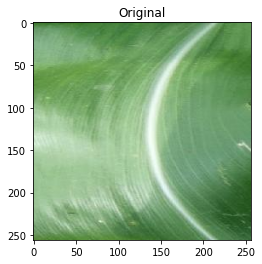

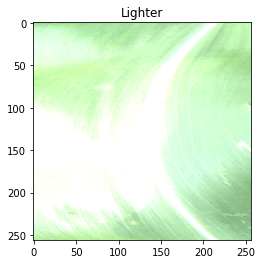

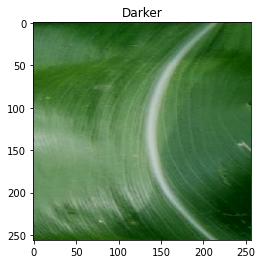

In [ ]:
image = cv2.imread('/content/Plant/Corn_healthy/00031d74-076e-4aef-b040-e068cd3576eb___R.S_HL 8315 copy 2.jpg')
plt_imshow("Original", image)

# increasing the pixel intensities in our input image by 100 is
# accomplished by constructing a NumPy array that has the *same
# dimensions* as our input image, filling it with ones, multiplying
# it by 100, and then adding the input image and matrix together
M = np.ones(image.shape, dtype="uint8") * 100
added = cv2.add(image, M)
plt_imshow("Lighter", added)

#Darker
M = np.ones(image.shape, dtype="uint8") * 50
subtracted = cv2.subtract(image, M)
plt_imshow("Darker", subtracted)

## Cropping

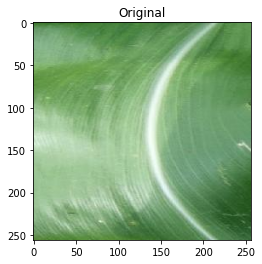

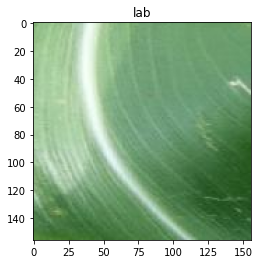

In [ ]:
# cropping an image with OpenCV is accomplished via simple NumPy
# array slices in startY:endY, startX:endX order -- here we are
# cropping the monitor from the image (these coordinates were
# determined using photo editing software such as Photoshop,
# GIMP, Paint, etc.)
# Dimension lab.jpeg = 720x1600
image = cv2.imread('/content/Plant/Corn_healthy/00031d74-076e-4aef-b040-e068cd3576eb___R.S_HL 8315 copy 2.jpg')
plt_imshow("Original", image)
lab = image[100:550, 100:550]
plt_imshow("lab", lab)

## Drawing

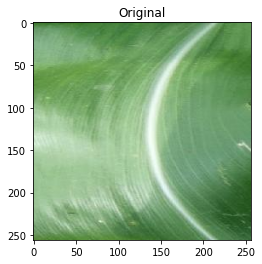

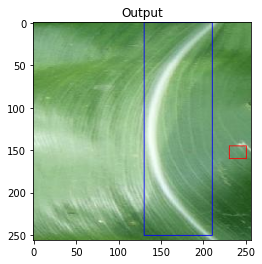

In [ ]:
# load the input image from disk
image = cv2.imread('/content/Plant/Corn_healthy/00031d74-076e-4aef-b040-e068cd3576eb___R.S_HL 8315 copy 2.jpg')
plt_imshow("Original", image)

# cv2.rectangle(canvas, (10, 10), (60, 60), green)
cv2.rectangle(image, (230, 145), (250, 160), (0, 0, 255))
cv2.rectangle(image, (130, 0), (210, 250), (255, 0, 0))

# show the output image
plt_imshow("Output", image)

## Flipping

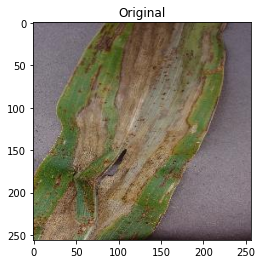

[INFO] flipping image horizontally...


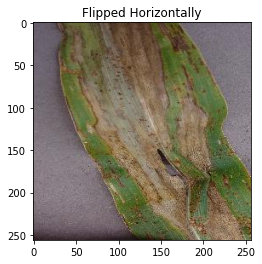

[INFO] flipping image vertically...


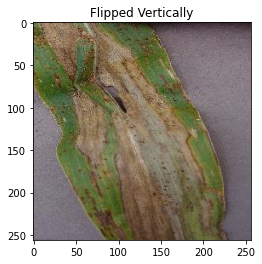

[INFO] flipping image horizontally and vertically...


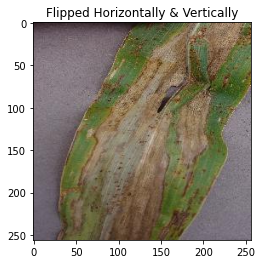

In [ ]:
# load the original input image and display it to our screen
image2 = cv2.imread('/content/Plant/Corn_Northern_Leaf_Blight/005318c8-a5fa-4420-843b-23bdda7322c2___RS_NLB 3853 copy.jpg')
plt_imshow("Original", image2)


# flip the image horizontally
print("[INFO] flipping image horizontally...")
flipped = cv2.flip(image2, 1)
plt_imshow("Flipped Horizontally", flipped)

# flip the image vertically
flipped = cv2.flip(image2, 0)
print("[INFO] flipping image vertically...")
plt_imshow("Flipped Vertically", flipped)

# flip the image along both axes
flipped = cv2.flip(image2, -1)
print("[INFO] flipping image horizontally and vertically...")
plt_imshow("Flipped Horizontally & Vertically", flipped)

## Masking

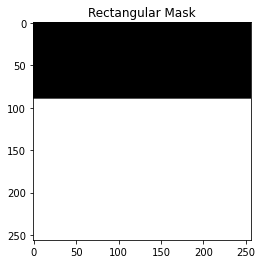

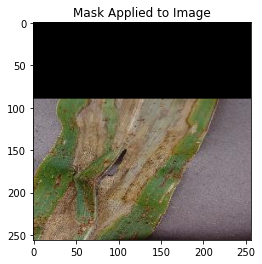

In [ ]:
# a mask is the same size as our image, but has only two pixel
# values, 0 and 255 -- pixels with a value of 0 (background) are
# ignored in the original image while mask pixels with a value of
# 255 (foreground) are allowed to be kept
mask = np.zeros(image2.shape[:2], dtype="uint8")
cv2.rectangle(mask, (0, 90), (290, 450), 255, -1)
plt_imshow("Rectangular Mask", mask)

# apply our mask -- notice how only the person in the image is
# cropped out
masked = cv2.bitwise_and(image2, image2, mask=mask)
plt_imshow("Mask Applied to Image", masked)

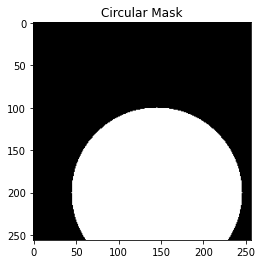

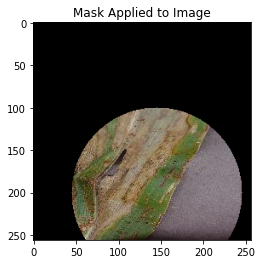

In [ ]:
# now, let's make a circular mask with a radius of 100 pixels and
# apply the mask again
mask = np.zeros(image2.shape[:2], dtype="uint8")
cv2.circle(mask, (145, 200), 100, 255, -1)
masked = cv2.bitwise_and(image2, image2, mask=mask)

# show the output images
plt_imshow("Circular Mask", mask)
plt_imshow("Mask Applied to Image", masked)

## Pixel

In [ ]:
# images are simply NumPy arrays -- with the origin (0, 0) located at
# the top-left of the image
(b, g, r) = image2[0, 0]
print("Pixel at (0, 0) - Red: {}, Green: {}, Blue: {}".format(r, g, b))

# access the pixel located at x=50, y=20
(b, g, r) = image2[20, 50]
print("Pixel at (50, 20) - Red: {}, Green: {}, Blue: {}".format(r, g, b))

# update the pixel at (50, 20) and set it to red
image2[20, 50] = (0, 0, 255)
(b, g, r) = image2[20, 50]
print("Pixel at (50, 20) - Red: {}, Green: {}, Blue: {}".format(r, g, b))

Pixel at (0, 0) - Red: 109, Green: 101, Blue: 114
Pixel at (50, 20) - Red: 118, Green: 111, Blue: 119
Pixel at (50, 20) - Red: 255, Green: 0, Blue: 0


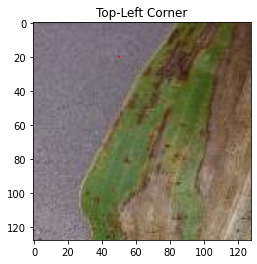

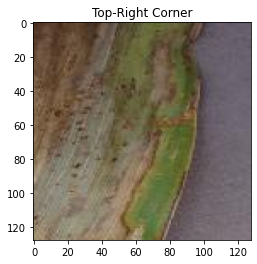

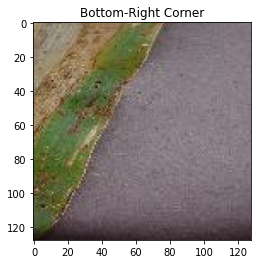

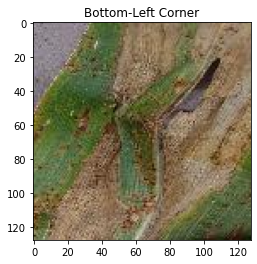

In [ ]:
(h, w) = image2.shape[:2]
# compute the center of the image, which is simply the width and height
# divided by two
(cX, cY) = (w // 2, h // 2)

# since we are using NumPy arrays, we can apply array slicing to grab
# large chunks/regions of interest from the image -- here we grab the
# top-left corner of the image
tl = image2[0:cY, 0:cX]
plt_imshow("Top-Left Corner", tl)



# in a similar fashion, we can crop the top-right, bottom-right, and
# bottom-left corners of the image and then display them to our
# screen
tr = image2[0:cY, cX:w]
br = image2[cY:h, cX:w]
bl = image2[cY:h, 0:cX]
plt_imshow("Top-Right Corner", tr)
plt_imshow("Bottom-Right Corner", br)
plt_imshow("Bottom-Left Corner", bl)



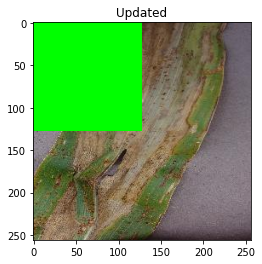

In [ ]:


# set the top-left corner of the original image to be green
image2[0:cY, 0:cX] = (0, 255, 0)

# Show our updated image
plt_imshow("Updated", image2)



## Read Write Image

In [ ]:
# load the image from disk via "cv2.imread" and then grab the spatial
# dimensions, including width, height, and number of channels
image3 = cv2.imread('/content/Plant/Corn_healthy/026bd735-b9f4-4eab-86f3-23df15dbec95___R.S_HL 7938 copy.jpg')
(h, w, c) = image3.shape[:3]

# display the image width, height, and number of channels to our
# terminal
print("width: {} pixels".format(image3.shape[1]))
print("height: {}  pixels".format(image3.shape[0]))
print("channels: {}".format(image3.shape[2]))

width: 256 pixels
height: 256  pixels
channels: 3


## Resize

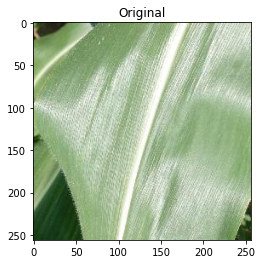

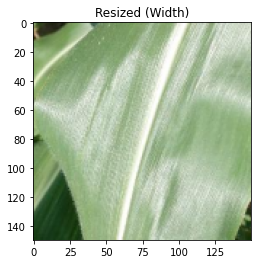

In [ ]:
# load the original input image and display it to our screen

plt_imshow("Original", image3)

# let's resize our image to be 150 pixels wide, but in order to
# prevent our resized image from being skewed/distorted, we must
# first calculate the ratio of the *new* width to the *old* width
r = 150.0 / image3.shape[1]
dim = (150, int(image3.shape[0] * r))

# perform the actual resizing of the image
resized = cv2.resize(image3, dim, interpolation=cv2.INTER_AREA)
plt_imshow("Resized (Width)", resized)

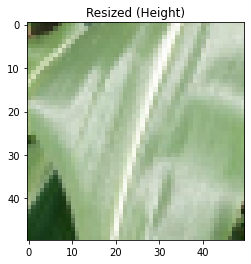

In [ ]:
# let's resize the image to have a width of 50 pixels, again keeping
# in mind the aspect ratio
r = 50.0 / image3.shape[0]
dim = (int(image3.shape[1] * r), 50)

# perform the resizing
resized = cv2.resize(image3, dim, interpolation=cv2.INTER_AREA)
plt_imshow("Resized (Height)", resized)

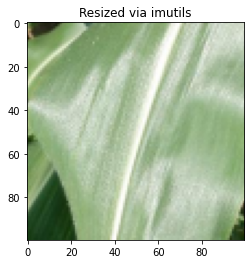

In [ ]:

# calculating the ratio each and every time we want to resize an
# image is a real pain, so let's use the imutils convenience
# function which will *automatically* maintain our aspect ratio
# for us
resized = imutils.resize(image3, width=100)
plt_imshow("Resized via imutils", resized)

[INFO] cv2.INTER_NEAREST


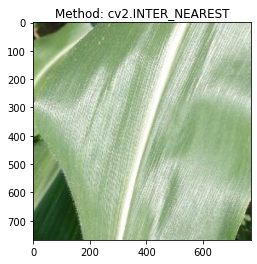

[INFO] cv2.INTER_LINEAR


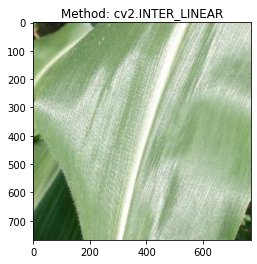

[INFO] cv2.INTER_AREA


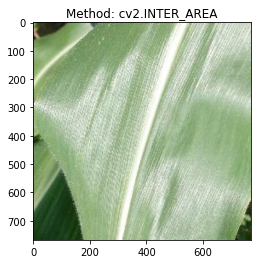

[INFO] cv2.INTER_CUBIC


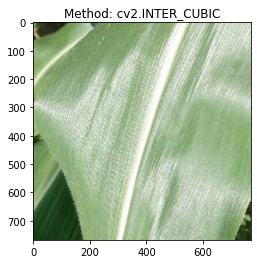

[INFO] cv2.INTER_LANCZOS4


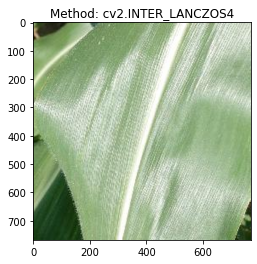

In [ ]:

# construct the list of interpolation methods in OpenCV
methods = [
	("cv2.INTER_NEAREST", cv2.INTER_NEAREST),
	("cv2.INTER_LINEAR", cv2.INTER_LINEAR),
	("cv2.INTER_AREA", cv2.INTER_AREA),
	("cv2.INTER_CUBIC", cv2.INTER_CUBIC),
	("cv2.INTER_LANCZOS4", cv2.INTER_LANCZOS4)]

# loop over the interpolation methods
for (name, method) in methods:
	# increase the size of the image by 3x using the current
	# interpolation method
	print("[INFO] {}".format(name))
	resized = imutils.resize(image3, width=image3.shape[1] * 3,
		inter=method)
	plt_imshow("Method: {}".format(name), resized)

## Rotate

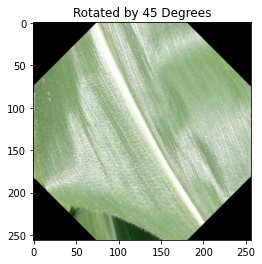

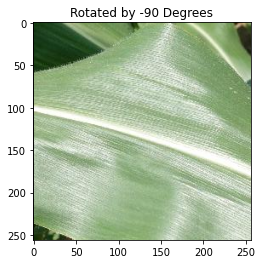

In [ ]:
# grab the dimensions of the image and calculate the center of the
# image
(h, w) = image3.shape[:2]
(cX, cY) = (w // 2, h // 2)

# rotate our image by 45 degrees around the center of the image
M = cv2.getRotationMatrix2D((cX, cY), 45, 1.0)
rotated = cv2.warpAffine(image3, M, (w, h))
plt_imshow("Rotated by 45 Degrees", rotated)

# rotate our image by -90 degrees around the image
M = cv2.getRotationMatrix2D((cX, cY), -90, 1.0)
rotated = cv2.warpAffine(image3, M, (w, h))
plt_imshow("Rotated by -90 Degrees", rotated)

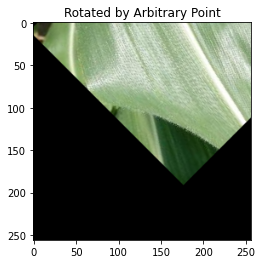

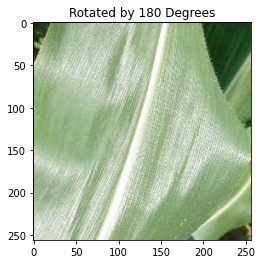

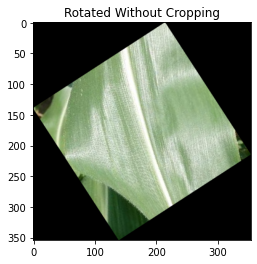

In [ ]:
# rotate our image around an arbitrary point rather than the center
M = cv2.getRotationMatrix2D((10, 10), 45, 1.0)
rotated = cv2.warpAffine(image3, M, (w, h))
plt_imshow("Rotated by Arbitrary Point", rotated)

# use our imutils function to rotate an image 180 degrees
rotated = imutils.rotate(image3, 180)
plt_imshow("Rotated by 180 Degrees", rotated)

# rotate our image by 33 degrees counterclockwise, ensuring the
# entire rotated image still views in the viewing area
rotated = imutils.rotate_bound(image3, -33)
plt_imshow("Rotated Without Cropping", rotated)

## Split_Merge

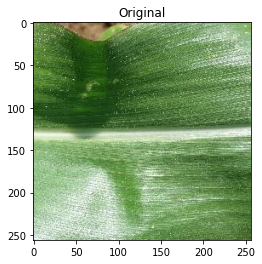

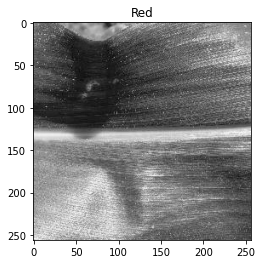

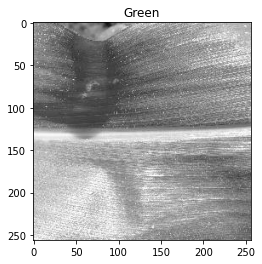

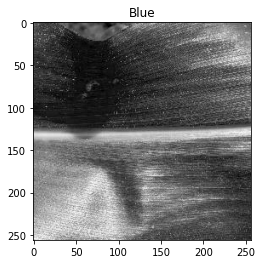

In [ ]:
# load the original input image and display it to our screen
image4 = cv2.imread('/content/Plant/Corn_healthy/0292a37f-07d0-401f-83d8-cde4c98547d8___R.S_HL 0630 copy 2.jpg')
plt_imshow("Original", image4)

(B, G, R) = cv2.split(image4)

# show each channel individually
plt_imshow("Red", R)
plt_imshow("Green", G)
plt_imshow("Blue", B)

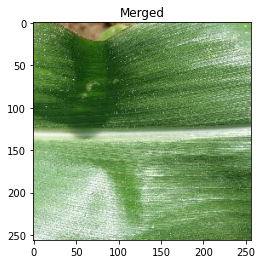

In [ ]:
merged = cv2.merge([B, G, R])
plt_imshow("Merged", merged)

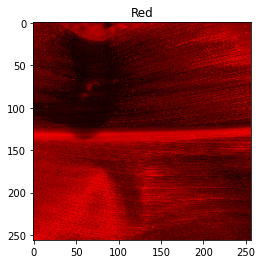

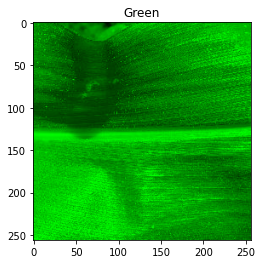

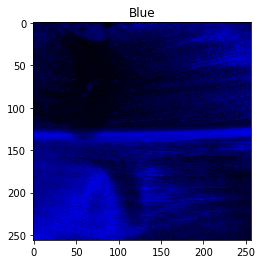

In [ ]:
# visualize each channel in color
zeros = np.zeros(image4.shape[:2], dtype="uint8")
plt_imshow("Red", cv2.merge([zeros, zeros, R]))
plt_imshow("Green", cv2.merge([zeros, G, zeros]))
plt_imshow("Blue", cv2.merge([B, zeros, zeros]))

## Translate

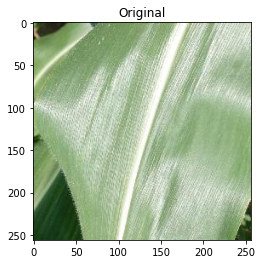

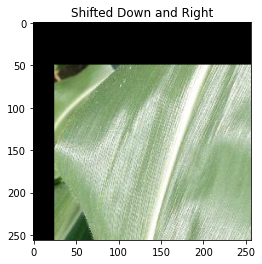

In [ ]:
plt_imshow("Original", image3)

# shift the image 25 pixels to the right and 50 pixels down
M = np.float32([[1, 0, 25], [0, 1, 50]])
shifted = cv2.warpAffine(image3, M, (image3.shape[1], image3.shape[0]))
plt_imshow("Shifted Down and Right", shifted)

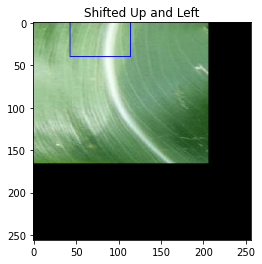

In [ ]:
# now, let's shift the image 50 pixels to the left and 90 pixels
# up by specifying negative values for the x and y directions,
# respectively
M = np.float32([[1, 0, -50], [0, 1, -90]])
shifted = cv2.warpAffine(image, M, (image3.shape[1], image3.shape[0]))
plt_imshow("Shifted Up and Left", shifted)

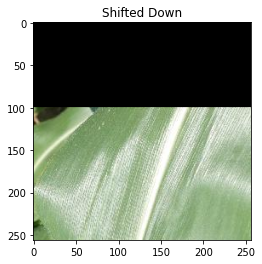

In [ ]:
# use the imutils helper function to translate the image 100 pixels
# down in a single function call
shifted = imutils.translate(image3, 0, 100)
plt_imshow("Shifted Down", shifted)